In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
def identify_categorical_columns(df):
    categorical_columns = []
    for col in df.columns:
        if df[col].dtype.name == "object":
            categorical_columns.append(col)
    return categorical_columns

In [3]:
def identify_date_time_columns(df):
    date_time_columns = []
    for col in df.columns:
        if pd.api.types.is_datetime_dtype(df[col]):
            date_time_columns.append(col)
    return date_time_columns


In [4]:
def handle_missing_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    return df  

In [5]:
def handle_duplicates(df):
    df.drop_duplicates(inplace=True)
    return df

In [6]:
def handle_outliers(df, threshold=3):
    for col in df.columns:
        if df[col].dtype.name in ["float64", "int64"]:
            df_z = df[col].apply(lambda x: (x - df[col].mean()) / df[col].std())
            df_outliers = df_z[abs(df_z) > threshold]
            df.drop(df_outliers.index, inplace=True)
    return df

In [7]:
def normalize_data(df):
    scaler = MinMaxScaler()
    df_norm = scaler.fit_transform(df)
    df_norm = pd.DataFrame(df_norm, columns=df.columns)
    return df_norm

In [8]:
def encode_data(df,categoriacal_columns):
    label=LabelEncoder()
    for i in categoriacal_columns:
        df[i]=label.fit_transform(df[i])
    return df

In [9]:
def handle_data(df):
    categorical_columns = identify_categorical_columns(df)
    df = encode_data(df, categorical_columns)
    df = handle_missing_values(df)
    df = normalize_data(df)
    return df

In [11]:
df=(pd.read_csv("milknew.csv"))
df.columns

Index(['Brand', 'pH', 'Temperature', 'Taste', 'Odour', 'Fat ', 'Turbidity',
       'Colour', 'Vitamins Ratio', 'Grade'],
      dtype='object')

In [12]:
df.head(10)

,Brand,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Vitamins Ratio,Grade
0,1,6.6,35,1,0,1,0,254,2,high
1,2,6.6,36,0,1,0,1,253,2,high
2,3,8.5,70,1,1,1,1,246,6,low
3,4,9.5,34,1,1,0,1,255,7,low
4,5,6.6,37,0,0,0,0,255,7,medium
5,6,6.6,37,1,1,1,1,255,6,high
6,7,5.5,45,1,0,1,1,250,2,low
7,8,4.5,60,0,1,1,1,250,4,low
8,9,8.1,66,1,0,1,1,255,5,low
9,10,6.7,45,1,1,0,0,247,3,medium


In [13]:
df.tail(10)

,Brand,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Vitamins Ratio,Grade
89,90,6.8,40,1,1,1,1,255,7,high
90,91,6.6,50,0,0,0,1,250,2,low
91,92,6.5,36,0,0,0,0,247,7,medium
92,93,6.6,50,0,0,0,0,255,6,low
93,94,6.8,45,1,1,1,0,245,7,high
94,95,9.5,34,1,1,0,1,255,7,low
95,96,6.5,37,0,0,0,0,255,7,medium
96,97,9.5,34,1,1,0,1,255,6,low
97,98,6.5,37,0,0,0,0,255,7,medium
98,99,6.6,37,1,1,1,1,255,7,high


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           99 non-null     int64  
 1   pH              99 non-null     float64
 2   Temperature     99 non-null     int64  
 3   Taste           99 non-null     int64  
 4   Odour           99 non-null     int64  
 5   Fat             99 non-null     int64  
 6   Turbidity       99 non-null     int64  
 7   Colour          99 non-null     int64  
 8   Vitamins Ratio  99 non-null     int64  
 9   Grade           99 non-null     object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.9+ KB


In [15]:
df.describe()

,Brand,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Vitamins Ratio
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,50.000000,6.720202,44.282828,0.525253,0.484848,0.616162,0.505051,251.606061,4.323232
std,28.722813,1.392618,10.969383,0.501903,0.502314,0.488794,0.502519,4.512609,2.142039
min,1.000000,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,1.000000
25%,25.500000,6.500000,37.000000,0.000000,0.000000,0.000000,0.000000,247.500000,2.000000
50%,50.000000,6.600000,40.000000,1.000000,0.000000,1.000000,1.000000,255.000000,4.000000
75%,74.500000,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,7.000000
max,99.000000,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,7.000000


In [16]:
df.shape

(99, 10)

In [17]:
df.isnull().sum()

Brand             0
pH                0
Temperature       0
Taste             0
Odour             0
Fat               0
Turbidity         0
Colour            0
Vitamins Ratio    0
Grade             0
dtype: int64

In [18]:
df['Grade'].value_counts()

Grade
low       41
medium    34
high      24
Name: count, dtype: int64

In [19]:
l = 1
m = 2
h = 3
df=df.replace({'Grade':{'low': 1, 'medium': 2, 'high': 3}})
df.head()

,Brand,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Vitamins Ratio,Grade
0,1,6.6,35,1,0,1,0,254,2,3
1,2,6.6,36,0,1,0,1,253,2,3
2,3,8.5,70,1,1,1,1,246,6,1
3,4,9.5,34,1,1,0,1,255,7,1
4,5,6.6,37,0,0,0,0,255,7,2


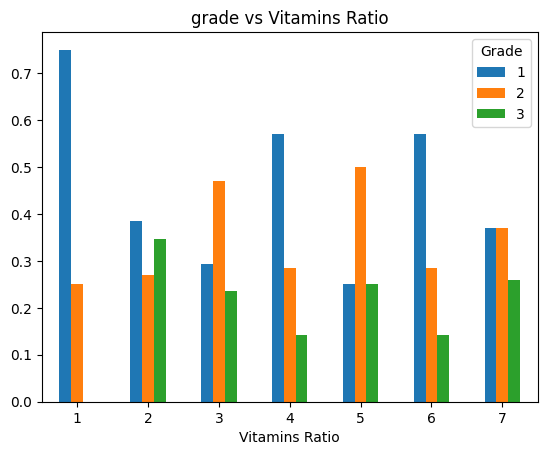

In [24]:
(df
.groupby(['Vitamins Ratio'])
.Grade#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade vs Vitamins Ratio', rot='horizontal')
);

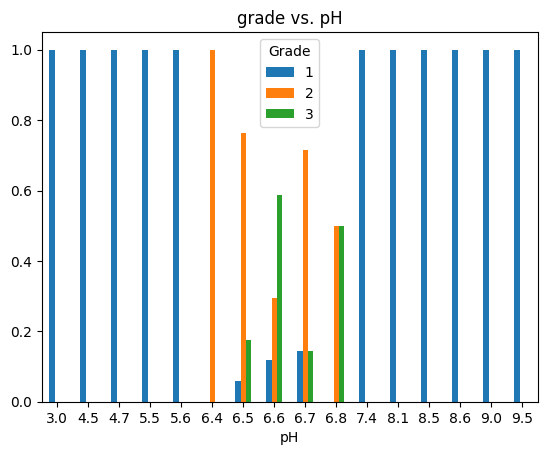

In [25]:
(df
.groupby(['pH'])
.Grade#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade vs. pH', rot='horizontal')
);

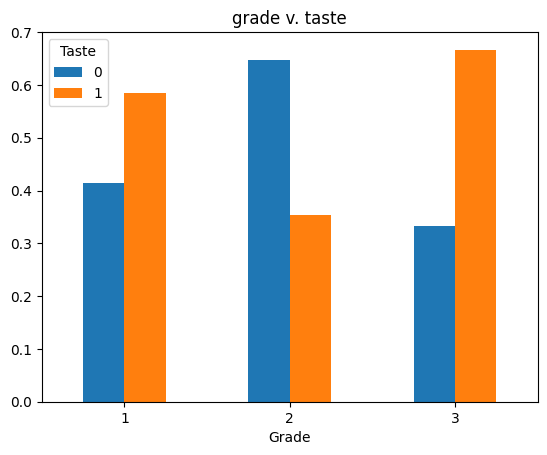

In [27]:
(df
.groupby(['Grade'])
.Taste#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade v. taste', rot='horizontal')
);

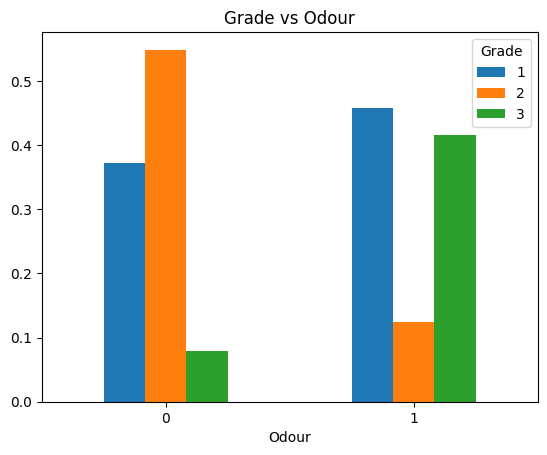

In [33]:
(df
.groupby(['Odour'])
.Grade
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='Grade vs Odour', rot='horizontal')
);

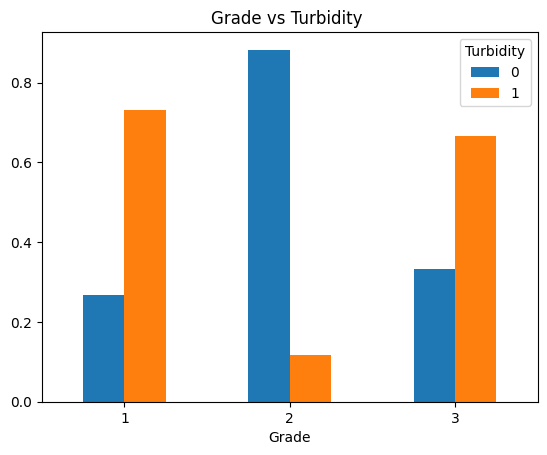

In [35]:
(df
.groupby(['Grade'])
.Turbidity #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='Grade vs Turbidity ', rot='horizontal')
);

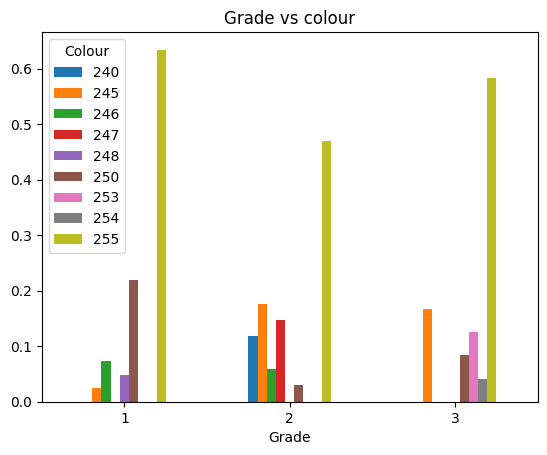

In [36]:
(df
.groupby(['Grade'])
.Colour #y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='Grade vs colour', rot='horizontal')
);

In [37]:
(df
.corr()
.style
.background_gradient(cmap="magma", axis=None)
)

,Brand,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Vitamins Ratio,Grade
Brand,1.000000,0.029031,-0.143246,-0.069367,-0.103258,-0.134460,-0.106751,0.031333,-0.053072,0.025889
pH,0.029031,1.000000,0.212906,0.025541,0.020864,-0.109915,0.119418,-0.103776,0.011813,-0.048393
Temperature,-0.143246,0.212906,1.000000,-0.060620,-0.028845,0.117513,0.181150,-0.009889,-0.110328,-0.412797
Taste,-0.069367,0.025541,-0.060620,1.000000,0.072363,0.372663,0.110748,-0.020342,0.058769,0.023738
Odour,-0.103258,0.020864,-0.028845,0.072363,1.000000,0.308550,0.475296,-0.031921,0.070983,0.159326
Fat,-0.134460,-0.109915,0.117513,0.372663,0.308550,1.000000,0.340315,0.120420,-0.104448,0.169826
Turbidity,-0.106751,0.119418,0.181150,0.110748,0.475296,0.340315,1.000000,0.156130,-0.029971,-0.138129
Colour,0.031333,-0.103776,-0.009889,-0.020342,-0.031921,0.120420,0.156130,1.000000,0.068201,-0.053119
Vitamins Ratio,-0.053072,0.011813,-0.110328,0.058769,0.070983,-0.104448,-0.029971,0.068201,1.000000,-0.020979
Grade,0.025889,-0.048393,-0.412797,0.023738,0.159326,0.169826,-0.138129,-0.053119,-0.020979,1.000000


<Axes: >

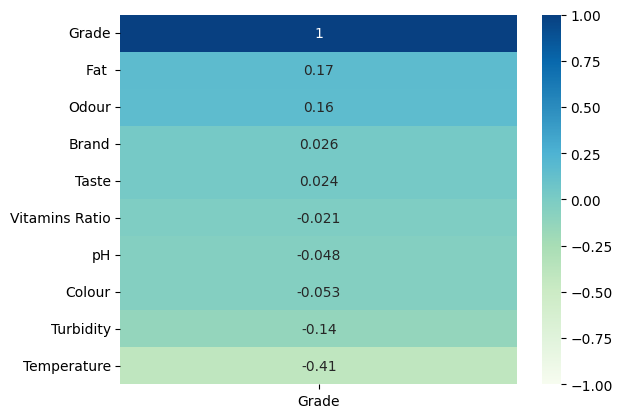

In [50]:
sns.heatmap(df.corr()[['Grade']].sort_values(by='Grade', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

In [40]:
lab=LabelEncoder()
df['Grade']=lab.fit_transform(df['Grade'])

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [41]:
X=df.drop(['Grade'],axis=1)
df1=handle_data(X)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

In [42]:
df.shape

(99, 10)

In [43]:
df1.shape

(99, 9)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df1,
 df['Grade'],
 test_size=0.2,
random_state=42)

In [45]:
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [47]:
no_classifiers = len(dict_classifiers.keys())
def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        classifier.fit(X_train, Y_train)
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        count+=1
    return df_results

In [48]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse i

                     classifier  train_score  training_time
3  Gradient Boosting Classifier     1.000000            0.0
4                 Decision Tree     1.000000            0.0
5                 Random Forest     1.000000            0.0
7                   Naive Bayes     0.898734            0.0
6                    Neural Net     0.873418            0.0
0           Logistic Regression     0.784810            0.0
2                    Linear SVM     0.784810            0.0
1             Nearest Neighbors     0.759494            0.0


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a futur